In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import lightgbm as ltb
import warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

In [30]:
acc_features = []
name_features = []

# STD

In [31]:
name = 'STD'

trainx = pd.read_csv('featured_data/'+name+'_trainx.csv')
trainx = trainx.set_index('Unnamed: 0')
trainx = trainx.reset_index(drop=True)

trainy = pd.read_csv('featured_data/'+name+'_trainy.csv')
trainy = trainy.set_index('Unnamed: 0')
trainy = trainy.reset_index(drop=True)

testx = pd.read_csv('featured_data/'+name+'_testx.csv')
testx = testx.set_index('Unnamed: 0')
testx = testx.reset_index(drop=True)

testy = pd.read_csv('featured_data/'+name+'_testy.csv')
testy = testy.set_index('Unnamed: 0')
testy = testy.reset_index(drop=True)

# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx,trainy)
expected1 = testy.values.flatten()
predicted1 = lightGBM_model.predict(testx)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

acc_features.append(accuracy)
name_features.append(name)

LGBMClassifier()

# RMS

In [32]:
name = 'RMS'

trainx = pd.read_csv('featured_data/'+name+'_trainx.csv')
trainx = trainx.set_index('Unnamed: 0')
trainx = trainx.reset_index(drop=True)

trainy = pd.read_csv('featured_data/'+name+'_trainy.csv')
trainy = trainy.set_index('Unnamed: 0')
trainy = trainy.reset_index(drop=True)

testx = pd.read_csv('featured_data/'+name+'_testx.csv')
testx = testx.set_index('Unnamed: 0')
testx = testx.reset_index(drop=True)

testy = pd.read_csv('featured_data/'+name+'_testy.csv')
testy = testy.set_index('Unnamed: 0')
testy = testy.reset_index(drop=True)

# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx,trainy)
expected1 = testy.values.flatten()
predicted1 = lightGBM_model.predict(testx)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

acc_features.append(accuracy)
name_features.append(name)

LGBMClassifier()

# IEMG

In [33]:
name = 'IEMG'

trainx = pd.read_csv('featured_data/'+name+'_trainx.csv')
trainx = trainx.set_index('Unnamed: 0')
trainx = trainx.reset_index(drop=True)

trainy = pd.read_csv('featured_data/'+name+'_trainy.csv')
trainy = trainy.set_index('Unnamed: 0')
trainy = trainy.reset_index(drop=True)

testx = pd.read_csv('featured_data/'+name+'_testx.csv')
testx = testx.set_index('Unnamed: 0')
testx = testx.reset_index(drop=True)

testy = pd.read_csv('featured_data/'+name+'_testy.csv')
testy = testy.set_index('Unnamed: 0')
testy = testy.reset_index(drop=True)

# train/test model
lightGBM_model = ltb.LGBMClassifier()
lightGBM_model.fit(trainx,trainy)
expected1 = testy.values.flatten()
predicted1 = lightGBM_model.predict(testx)
counter = 0
for i in range(0, len(expected1)):
    if expected1[i] == predicted1[i]:
        counter += 1

accuracy = counter/len(expected1)

acc_features.append(accuracy)
name_features.append(name)

LGBMClassifier()

In [34]:
acc_features
name_features

[0.7971136705904047, 0.7997356855272459, 0.7866813166548852]

['STD', 'RMS', 'IEMG']

# Plot

Text(0, 3, '0.7971136705904047')

Text(0, 3, '0.7997356855272459')

Text(0, 3, '0.7866813166548852')

Text(0.5, 0, 'features')

Text(0, 0.5, 'Accuracy %')

[Text(0, 0, 'STD'), Text(1, 0, 'RMS'), Text(2, 0, 'IEMG')]

(0.0, 1.0)

Text(0.5, 1.0, 'single feature performance (data from subject s011)')

No handles with labels found to put in legend.


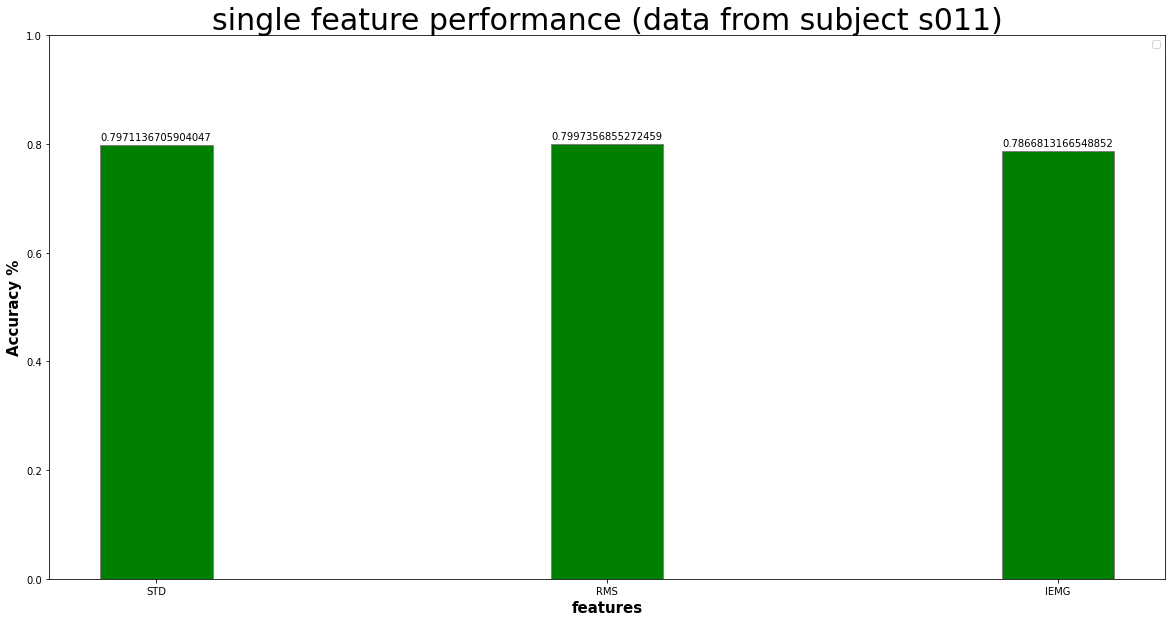

In [36]:
# set width of bar
barWidth = 0.25
fig,ax = plt.subplots(figsize =(20, 10))

# Set position of bar on X axis
br1 = np.arange(len(acc_features))

# Make the plot
acc = ax.bar(br1, acc_features, color ='g', width = barWidth, edgecolor ='grey')
for p in acc:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# Adding Xticks
ax.set_xlabel('features', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Accuracy %', fontweight ='bold', fontsize = 15)
ax.set_xticks(br1)
ax.set_xticklabels(name_features)

ax.set_ylim(0, 1)
ax.set_title('single feature performance (data from subject s011)',size=30)
ax.legend()
plt.show()